In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plot.band_plot import line_bar_plot

In [4]:
epsilon_values = [0.02, 0.04, 0.06, 0.08, 0.1]

In [5]:
subsample_rates = [0.25, 0.5, 0.75]

In [6]:
attack_type = 'self_distance'
strategy = 'c_im_m_id_c_da'

In [50]:
file_dir = os.path.join('../results/',
                        strategy,
                        attack_type,
                        'epsilon_{:.2f}.csv')
df_list = [pd.read_csv(file_dir.format(epsilon)) for epsilon in epsilon_values]

for index, epsilon in enumerate(epsilon_values):
    df_list[index]['epsilon'] = epsilon
    df_list[index]['subsample_rate'] = 1.0

In [51]:
for rate in subsample_rates + [1.0]:
    df_zero = pd.read_csv('../results/c_im_c_id_c_da/none/epsilon_0.0.csv')
    df_zero['epsilon'] = 0.0
    df_zero['subsample_rate'] = rate
    df_list.append(df_zero)

In [52]:
file_dir = os.path.join('../results/',
                        strategy,
                        attack_type,
                        'epsilon_{:.2f}_subsample_{}.csv')

In [53]:
for epsilon in epsilon_values:
    for rate in subsample_rates:
        data_frame = pd.read_csv(file_dir.format(epsilon, rate))
        data_frame['epsilon'] = epsilon
        data_frame['subsample_rate'] = rate
        df_list.append(data_frame)

In [54]:
concat_df = pd.concat(df_list, axis=0)

In [55]:
concat_df['recall_percentage'] = concat_df['recall_count'] / np.minimum(concat_df['num_possible'], concat_df['k'])

In [56]:
concat_df = concat_df.sort_values(by='subsample_rate')

In [57]:
concat_df[concat_df['subsample_rate'] == 1.0]

,identity,image_index,recall_count,k,num_possible,epsilon,subsample_rate,recall_percentage
677582,n005726,460,0,100,461,0.04,1.0,0.0
451718,n006301,78,0,100,468,0.04,1.0,0.0
451719,n006301,78,0,1000,468,0.04,1.0,0.0
451720,n006301,79,0,1,468,0.04,1.0,0.0
451721,n006301,79,0,10,468,0.04,1.0,0.0
...,...,...,...,...,...,...,...,...
677577,n005726,459,0,10,461,0.08,1.0,0.0
677576,n005726,459,0,1,461,0.08,1.0,0.0
677575,n005726,458,0,1000,461,0.08,1.0,0.0
4,n004449,1,0,1,322,0.10,1.0,0.0


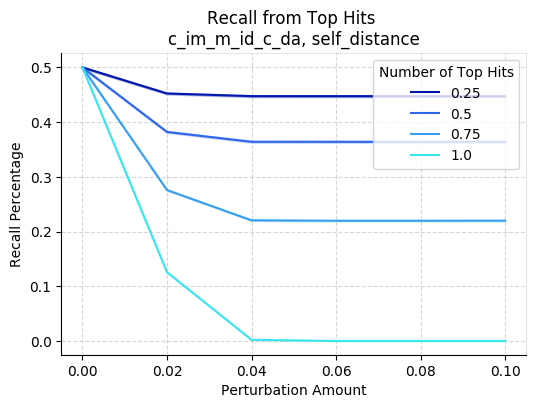

In [66]:
fig, ax = line_bar_plot(x='epsilon',
                        y='recall_percentage',
                        data=concat_df[concat_df['k'] == 100],
                        color_by='subsample_rate',
                        use_bootstrap=False,
                        color='royalblue',
                        title='Recall from Top Hits \n{}, {}'.format(strategy, attack_type),
                        ylabel='Recall Percentage',
                        xlabel='Perturbation Amount',
                        legend_title='Number of Top Hits',
                        colors=['#0017ad',
                                '#2d67ed',
                                '#37a0f0',
                                '#37e6f0'])
fig_dir = os.path.join('figures/',
                       attack_type,
                       strategy,
                       'subsample_rp.pdf')
plt.savefig(fig_dir)

In [59]:
concat_df['discovery_rate'] = (concat_df['recall_count'] > 0).astype(int)

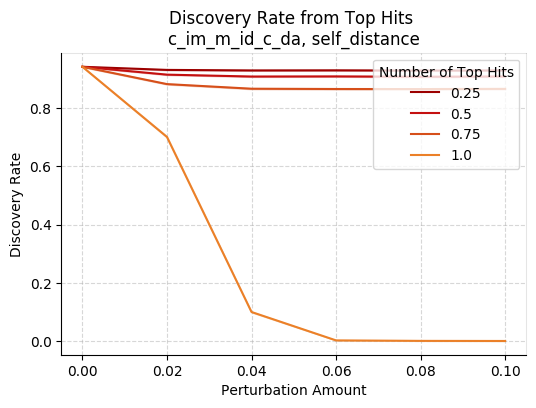

In [67]:
fig, ax = line_bar_plot(x='epsilon',
                        y='discovery_rate',
                        data=concat_df[concat_df['k'] == 100],
                        color_by='subsample_rate',
                        use_bootstrap=False,
                        color='royalblue',
                        title='Discovery Rate from Top Hits \n{}, {}'.format(strategy, attack_type),
                        ylabel='Discovery Rate',
                        xlabel='Perturbation Amount',
                        legend_title='Number of Top Hits',
                        colors=['#9c0000',
                                '#c41010',
                                '#d64f1a',
                                '#eb8028'])
fig_dir = os.path.join('figures/',
                       attack_type,
                       strategy,
                       'subsample_dr.pdf')
plt.savefig(fig_dir)